In [22]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] =(12,6)

In [23]:
#import the dataset
driver = pd.read_csv("driver-data.csv")
driver.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [24]:
driver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [25]:
#check the describtive statistics
driver.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041522,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [26]:
#check the missing value
driver.isnull().sum()

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

In [27]:
from sklearn.cluster import KMeans

In [28]:
#define the number of cluster
kmeans = KMeans(n_clusters=2)
driver_analyze = driver.drop('id', axis=1)

In [29]:
#Fit the cluster
kmeans.fit(driver_analyze)

KMeans(n_clusters=2)

In [30]:
#to check cluster center
kmeans.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [31]:
print(kmeans.labels_)
print(len(kmeans.labels_))

[0 0 0 ... 1 1 1]
4000


In [32]:
print(type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique,counts)))

<class 'numpy.ndarray'>
{0: 3200, 1: 800}


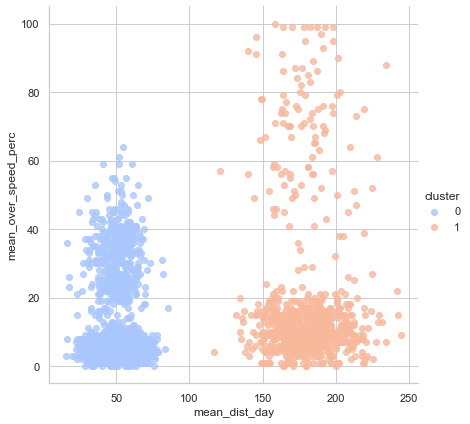

In [33]:
#Plot the cluster to see the distribution
driver_analyze['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=driver_analyze, hue = 'cluster'
            ,palette='coolwarm', size =6, aspect=1, fit_reg=False)

In [36]:
#Iterate the same by changeing the number of clusters to 4 and evaluate the culter center 
kmeans_4=KMeans(n_clusters=4)
kmeans_4.fit(driver.drop('id',axis=1))
kmeans_4.fit(driver.drop('id',axis=1))
print(kmeans_4.cluster_centers_)
unique, counts = np.unique(kmeans_4.labels_,return_counts=True)


kmeans_4.cluster_centers_
print(dict(zip(unique,counts)))

[[ 50.43591549  32.39671362]
 [180.34311782  10.52011494]
 [ 49.98800649   5.20944484]
 [177.83509615  70.28846154]]
{0: 426, 1: 696, 2: 2774, 3: 104}


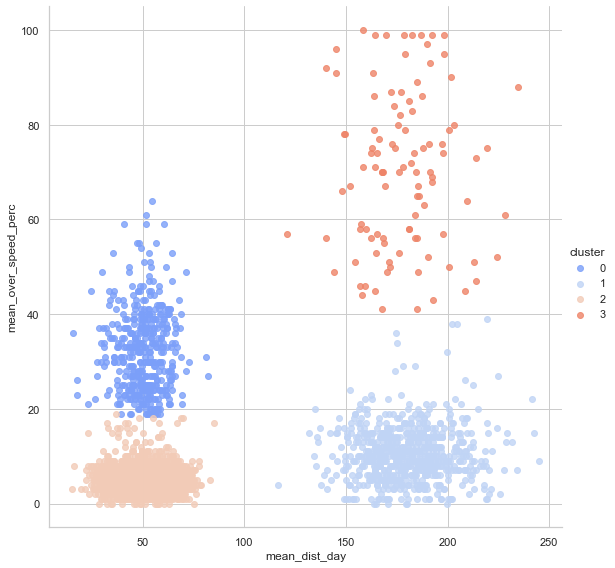

In [38]:
#Draw the cluster to see the distriburion of datapoint and Draw interence out of both the plot
driver_analyze['cluster'] = kmeans_4.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc', data=driver_analyze, hue= 'cluster',
            palette='coolwarm',size=8,aspect=1, fit_reg=False)
